### 1.Dataset

In [ ]:
import pandas as pd
df = pd.read_csv(r"E:/PROJECT/RUN-EU/PORTUGAL/NUMERICAL_METHOD/DATA/DATA_WHITE_HANGING.csv")
df

In [2]:
df['Country'] = df['Country'].astype('category')
df['Country'] = df['Country'].cat.codes
df

,Description,Quantity,InvoiceDate,day,month,year,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,1,12,2010,2.55,15
1,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:02,1,12,2010,2.55,15
2,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:32,1,12,2010,2.55,15
3,WHITE HANGING HEART T-LIGHT HOLDER,64,12/1/2010 10:19,1,12,2010,2.55,15
4,WHITE HANGING HEART T-LIGHT HOLDER,32,12/1/2010 10:39,1,12,2010,2.55,15
...,...,...,...,...,...,...,...,...
2364,WHITE HANGING HEART T-LIGHT HOLDER,1,12/8/2011 10:59,8,12,2011,2.95,15
2365,WHITE HANGING HEART T-LIGHT HOLDER,2,12/8/2011 11:15,8,12,2011,2.95,15
2366,WHITE HANGING HEART T-LIGHT HOLDER,6,12/8/2011 12:28,8,12,2011,2.95,15
2367,WHITE HANGING HEART T-LIGHT HOLDER,32,12/8/2011 18:03,8,12,2011,2.55,15


### 2.Model_ Case 1: total price

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
 
#Loading the data after cleaning process and selecting White Hanging Heart product for Analysis.
file_path = r"E:/PROJECT/RUN-EU/PORTUGAL/NUMERICAL_METHOD/DATA/Team_3_Data.csv"
df = pd.read_csv(file_path)
 
# Viewing the first few rows of the DataFrame
print(df.head())
 
# Prepare the feature (independent variable) and target (dependent variable) sets
X = df[["Quantity", "day", "month", "year", "UnitPrice","Country"]]  # Feature set
y = df["UnitPrice"] * df["Quantity"]  # Calculate turnover
 


   Product Code                         Description  Quantity  \
0             1  WHITE HANGING HEART T-LIGHT HOLDER         6   
1             1  WHITE HANGING HEART T-LIGHT HOLDER        12   
2             1  WHITE HANGING HEART T-LIGHT HOLDER        12   
3             1  WHITE HANGING HEART T-LIGHT HOLDER        72   
4             1  WHITE HANGING HEART T-LIGHT HOLDER        12   

        InvoiceDate  day  month  year  UnitPrice          Country  \
0  20/01/2011 12:11   20      1  2011       2.95        Australia   
1  10/03/2011 14:42   10      3  2011       2.95  Channel Islands   
2  01/08/2011 14:16    1      8  2011       2.95  Channel Islands   
3  14/10/2011 12:29   14     10  2011       2.95  Channel Islands   
4  06/11/2011 10:29    6     11  2011       2.95  Channel Islands   

   Country-Number  
0               1  
1               2  
2               2  
3               2  
4               2  


In [5]:
# Encode categorical variables 'Country' 
X = pd.get_dummies(X, columns=["Country"], drop_first=True)
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Multiple Linear Regression model
model = LinearRegression()
 
# Fit the model to the training data
model.fit(X_train, y_train)
 
# Make predictions using the testing set
y_pred = model.predict(X_test)
 
# Print out the model performance metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
 


Mean Squared Error: 935.5496576524336
R^2 Score: 0.9684267567881494


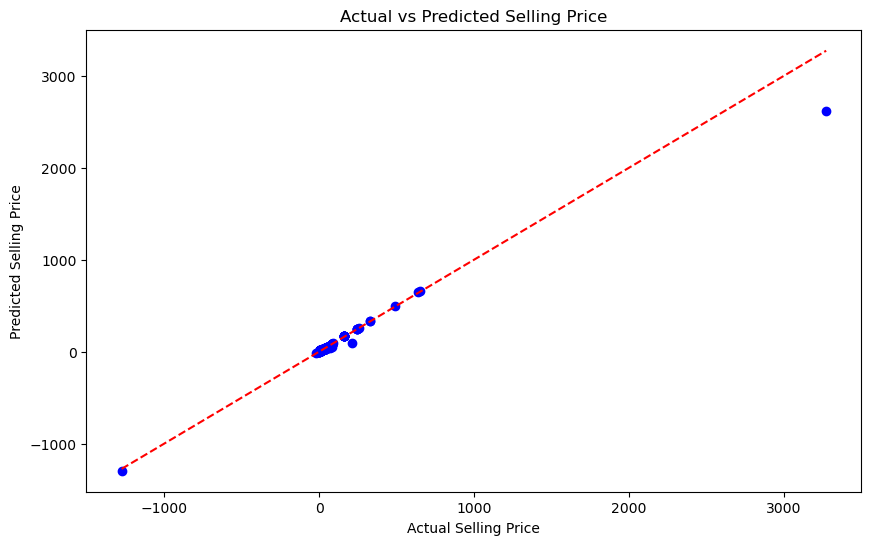

In [6]:
# Graphical representation of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line for prediction
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

### Predict future Price

In [7]:
# Price prediction
future_data = pd.DataFrame({
    "Quantity": [1],
    "day": [10],
    "month": [10],
    "year": [2025],
    "UnitPrice": [1],
    "Country": ["United Kingdom"]
})
future_data = pd.get_dummies(future_data, columns=["Country"], drop_first=True)
 
# Ensure future_data has the same columns as the training data
missing_cols = set(X_train.columns) - set(future_data.columns)
for col in missing_cols:
    future_data[col] = 0
future_data = future_data[X_train.columns]
 
future_price = model.predict(future_data)
print("Predicted Future Price:", future_price)

Predicted Future Price: [1.93885082]


### Model_Case 2: Just unit price

Mean Squared Error: 2.294549977092901e-28
R^2 Score: 1.0


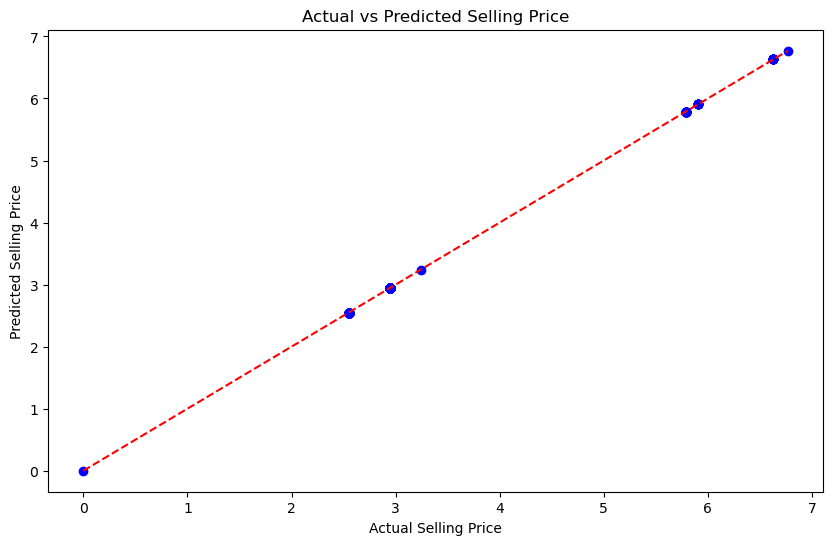

Predicted Prices for 2025:
Future price 1: Predicted Selling Price = 2.40
Future price 2: Predicted Selling Price = 2.55
Future price 3: Predicted Selling Price = 2.95
Future price 4: Predicted Selling Price = 3.20
Future price 5: Predicted Selling Price = 5.79
Future price 6: Predicted Selling Price = 6.63
Predicted Future Price: [2.4]


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the CSV file
file_path = r"E:/PROJECT/RUN-EU/PORTUGAL/NUMERICAL_METHOD/DATA/Team_3_Data.csv"
df = pd.read_csv(file_path)

# Convert 'Country' column to categorical and then to numerical codes
df['Country'] = df['Country'].astype('category')
df['Country_Code'] = df['Country'].cat.codes

# Prepare the feature (independent variable) and target (dependent variable) sets
X = df[["Quantity", "day", "month", "year", "UnitPrice", "Country_Code"]]  # Feature set
y = df["UnitPrice"]  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Multiple Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print out the model performance metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Graphical representation of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line for perfect prediction
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

# Predict Prices for Future Years

def predict_future_prices(year, quantities, days, months, unit_prices, countries):
    future_data = {
        "Quantity": quantities,
        "day": days,
        "month": months,
        "year": [year] * len(quantities),
        "UnitPrice": unit_prices,
        "Country": countries
    }

    # Convert the future data to a DataFrame
    df_future = pd.DataFrame(future_data)

    # Convert 'Country' to categorical codes as was done with training data
    df_future['Country'] = df_future['Country'].astype('category')
    df_future['Country_Code'] = df_future['Country'].cat.codes

    # Prepare the feature set from the future data
    X_future = df_future[["Quantity", "day", "month", "year", "UnitPrice", "Country_Code"]]

    # Make predictions using the trained model
    future_predictions = model.predict(X_future)

    return future_predictions

# Example data for predictions in 2025 and 2026
quantities = [5,1,6,4,20, 10] 
days = [15,2,5,11,22, 20]       
months = [8,9,10,3,2, 12]      
unit_prices = [2.4,2.55,2.95,3.2,5.79,6.63]  
countries = ["Country1", "Country2","Country3","Country4","Country5","Country6"]  

# Predict prices for 2025
predictions_2025 = predict_future_prices(2025, quantities, days, months, unit_prices, countries)
print("Predicted Prices for 2025:")
for i, prediction in enumerate(predictions_2025):
    print(f"Future price {i+1}: Predicted Selling Price = {prediction:.2f}")

# Price prediction
future_data = pd.DataFrame({
    "Quantity": [5],
    "day": [15],
    "month": [8],
    "year": [2025],
    "UnitPrice": [2.4],
    "Country": ["United Kingdom"]
})
future_data = pd.get_dummies(future_data, columns=["Country"], drop_first=True)
 
# Ensure future_data has the same columns as the training data
missing_cols = set(X_train.columns) - set(future_data.columns)
for col in missing_cols:
    future_data[col] = 0
future_data = future_data[X_train.columns]
 
future_price = model.predict(future_data)
print("Predicted Future Price for 2025:", future_price)